### Setup

In [97]:
from IPython.display import clear_output
!pip install deepface
!pip install opencv-contrib-python
clear_output()

### Import Libraries

In [98]:
import cv2
from deepface import DeepFace
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [99]:
plt.rcParams.update({
    "lines.color": "white",
    "patch.edgecolor": "white",
    "text.color": "white",
    "axes.facecolor": "black",
    "axes.edgecolor": "white",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "grid.color": "grey",
    "figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black"})

### Read Image

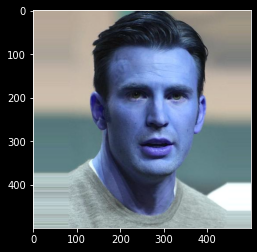

In [100]:
image = cv2.imread("male.jpg")
plt.imshow(image)

In [101]:
predicted = DeepFace.analyze(image)

Action: race: 100%|██████████| 4/4 [00:02<00:00,  1.61it/s]


In [102]:
print(predicted)

{'emotion': {'angry': 1.679641853549591, 'disgust': 0.00909282225248462, 'fear': 1.835198623549856, 'happy': 4.729492871731095, 'sad': 26.139877804510462, 'surprise': 0.18789581910272354, 'neutral': 65.41880163066396}, 'dominant_emotion': 'neutral', 'region': {'x': 152, 'y': 89, 'w': 269, 'h': 269}, 'age': 28, 'gender': 'Man', 'race': {'asian': 6.389303308651506e-07, 'indian': 4.578159185086861e-07, 'black': 9.319824773035279e-09, 'white': 99.96837377548218, 'middle eastern': 0.018354006169829518, 'latino hispanic': 0.01327154750470072}, 'dominant_race': 'white'}


In [103]:
print("=== DEEP FACE ANALYSIS ===")
print("Emotion:", predicted['dominant_emotion'])
print("Race:", predicted['dominant_race'])
print("Age:", predicted['age'])
print("Gender:", predicted['gender'])

=== DEEP FACE ANALYSIS ===
Emotion: neutral
Race: white
Age: 28
Gender: Man


### Make Function

In [104]:
haar = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [105]:
def deepface_analysis(image):
    font = cv2.FONT_HERSHEY_SIMPLEX
    image = cv2.imread(image)
    predicted = DeepFace.analyze(image)
    print("=== DEEP FACE ANALYSIS ===")
    print("Emotion:", predicted['dominant_emotion'])
    print("Race:", predicted['dominant_race'])
    print("Age:", predicted['age'])
    print("Gender:", predicted['gender'])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    face = haar.detectMultiScale(image, 1.3, 5)
    for (x,y,w,h) in face:
        cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),5)
        cv2.putText(image, predicted['dominant_emotion'], (x-128,y+16), font, 1, (255,255,255), 2, cv2.LINE_AA)
        cv2.putText(image, predicted['dominant_race'], (x-128,y+40), font, 1, (255,255,255), 2, cv2.LINE_AA)
        cv2.putText(image, str(predicted['age']), (x-128,y+70), font, 1, (255,255,255), 2, cv2.LINE_AA)
        cv2.putText(image, predicted['gender'], (x-128,y+100), font, 1, (255,255,255), 2, cv2.LINE_AA)
    plt.imshow(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    cv2.imwrite("result.jpg", image)

Action: race: 100%|██████████| 4/4 [00:02<00:00,  1.59it/s]


=== DEEP FACE ANALYSIS ===
Emotion: sad
Race: white
Age: 21
Gender: Man


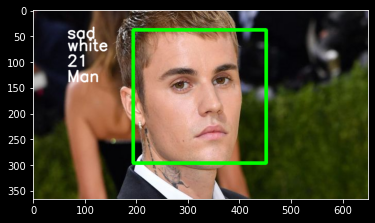

In [106]:
deepface_analysis("justin-bieber_169.jpeg")